In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, transforms, gridspec
from scipy.optimize import fsolve
from collections import namedtuple
#@title Figure Settings
import ipywidgets as widgets       # interactive display
from ipywidgets import GridspecLayout, HBox, VBox, FloatSlider, Layout, ToggleButtons
from ipywidgets import interactive, interactive_output, Checkbox, Select
from IPython.display import clear_output
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

import warnings
warnings.filterwarnings("ignore")

# @title Plotting Functions

def plot_joint_probs(P, ):
    assert np.all(P >= 0), "probabilities should be >= 0"
    # normalize if not
    P = P / np.sum(P)
    marginal_y = np.sum(P,axis=1)
    marginal_x = np.sum(P,axis=0)

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    # start with a square Figure
    fig = plt.figure(figsize=(5, 5))

    joint_prob = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    rect_x_cmap = plt.cm.Blues
    rect_y_cmap = plt.cm.Reds

    # Show joint probs and marginals
    ax = fig.add_axes(joint_prob)
    ax_x = fig.add_axes(rect_histx, sharex=ax)
    ax_y = fig.add_axes(rect_histy, sharey=ax)

    # Show joint probs and marginals
    ax.matshow(P,vmin=0., vmax=1., cmap='Greys')
    ax_x.bar(0, marginal_x[0], facecolor=rect_x_cmap(marginal_x[0]))
    ax_x.bar(1, marginal_x[1], facecolor=rect_x_cmap(marginal_x[1]))
    ax_y.barh(0, marginal_y[0], facecolor=rect_y_cmap(marginal_y[0]))
    ax_y.barh(1, marginal_y[1], facecolor=rect_y_cmap(marginal_y[1]))
    # set limits
    ax_x.set_ylim([0,1])
    ax_y.set_xlim([0,1])

    # show values
    ind = np.arange(2)
    x,y = np.meshgrid(ind,ind)
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{P[i,j]:.2f}"
        ax.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = marginal_x[i]
        c = f"{v:.2f}"
        ax_x.text(i, v +0.1, c, va='center', ha='center', color='black')
        v = marginal_y[i]
        c = f"{v:.2f}"
        ax_y.text(v+0.2, i, c, va='center', ha='center', color='black')

    # set up labels
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(['Silver','Gold'])
    ax.set_yticklabels(['Small', 'Large'])
    ax.set_xlabel('color')
    ax.set_ylabel('size')
    ax_x.axis('off')
    ax_y.axis('off')
    return fig


def plot_prior_likelihood_posterior(prior, likelihood, posterior):

    # definitions for the axes
    left, width = 0.05, 0.3
    bottom, height = 0.05, 0.9
    padding = 0.12
    small_width = 0.1
    left_space = left + small_width + padding
    added_space = padding + width

    fig = plt.figure(figsize=(12, 4))

    rect_prior = [left, bottom, small_width, height]
    rect_likelihood = [left_space , bottom , width, height]
    rect_posterior = [left_space +  added_space, bottom , width, height]

    ax_prior = fig.add_axes(rect_prior)
    ax_likelihood = fig.add_axes(rect_likelihood, sharey=ax_prior)
    ax_posterior = fig.add_axes(rect_posterior, sharey = ax_prior)

    rect_colormap = plt.cm.Blues

    # Show posterior probs and marginals
    ax_prior.barh(0, prior[0], facecolor = rect_colormap(prior[0, 0]))
    ax_prior.barh(1, prior[1], facecolor = rect_colormap(prior[1, 0]))
    ax_likelihood.matshow(likelihood, vmin=0., vmax=1., cmap='Reds')
    ax_posterior.matshow(posterior, vmin=0., vmax=1., cmap='Greens')


    # Probabilities plot details
    # ax_prior.set(xlim = [1, 0], yticks = [0, 1], yticklabels = ['left', 'right'],
    #              ylabel = 'state (s)', title = "Prior p(s)")
    ax_prior.set(xlim = [1, 0], xticks = [], yticks = [0, 1], yticklabels = ['left', 'right'],
                 title = "Prior p(s)")
    ax_prior.yaxis.tick_right()
    ax_prior.spines['left'].set_visible(False)
    ax_prior.spines['bottom'].set_visible(False)

    # Likelihood plot details
    ax_likelihood.set(xticks = [0, 1], xticklabels = ['fish', 'no fish'],
                  yticks = [0, 1], yticklabels = ['left', 'right'],
                   ylabel = 'state (s)', xlabel = 'measurement (m)',
                   title = 'Likelihood p(m (left) | s)')
    ax_likelihood.xaxis.set_ticks_position('bottom')
    ax_likelihood.spines['left'].set_visible(False)
    ax_likelihood.spines['bottom'].set_visible(False)

    # Posterior plot details

    ax_posterior.set(xticks = [0, 1], xticklabels = ['fish', 'no fish'],
                  yticks = [0, 1], yticklabels = ['left', 'right'],
                   ylabel = 'state (s)', xlabel = 'measurement (m)',
                   title = 'Posterior p(s | m)')
    ax_posterior.xaxis.set_ticks_position('bottom')
    ax_posterior.spines['left'].set_visible(False)
    ax_posterior.spines['bottom'].set_visible(False)


    # show values
    ind = np.arange(2)
    x,y = np.meshgrid(ind,ind)
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{posterior[i,j]:.2f}"
        ax_posterior.text(j,i, c, va='center', ha='center', color='black')
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{likelihood[i,j]:.2f}"
        ax_likelihood.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = prior[i, 0]
        c = f"{v:.2f}"
        ax_prior.text(v+0.2, i, c, va='center', ha='center', color='black')


def plot_prior_likelihood(ps, p_a_s1, p_a_s0, measurement):
    likelihood = np.asarray([[p_a_s1, 1-p_a_s1],[p_a_s0, 1-p_a_s0]])
    assert 0.0 <= ps <= 1.0
    prior = np.asarray([ps, 1 - ps])
    if measurement == "Fish":
        posterior = likelihood[:, 0] * prior
    else:
        posterior = (likelihood[:, 1] * prior).reshape(-1)
    posterior /= np.sum(posterior)

    # definitions for the axes
    left, width = 0.05, 0.3
    bottom, height = 0.05, 0.9
    padding = 0.12
    small_width = 0.2
    left_space = left + small_width + padding
    small_padding = 0.05

    fig = plt.figure(figsize=(12, 4))

    rect_prior = [left, bottom, small_width, height]
    rect_likelihood = [left_space , bottom , width, height]
    rect_posterior = [left_space + width + small_padding, bottom , small_width, height]

    ax_prior = fig.add_axes(rect_prior)
    ax_likelihood = fig.add_axes(rect_likelihood, sharey=ax_prior)
    ax_posterior = fig.add_axes(rect_posterior, sharey=ax_prior)

    prior_colormap = plt.cm.Blues
    posterior_colormap = plt.cm.Greens

    # Show posterior probs and marginals
    ax_prior.barh(0, prior[0], facecolor = prior_colormap(prior[0]))
    ax_prior.barh(1, prior[1], facecolor = prior_colormap(prior[1]))
    ax_likelihood.matshow(likelihood, vmin=0., vmax=1., cmap='Reds')
    # ax_posterior.matshow(posterior, vmin=0., vmax=1., cmap='')
    ax_posterior.barh(0, posterior[0], facecolor = posterior_colormap(posterior[0]))
    ax_posterior.barh(1, posterior[1], facecolor = posterior_colormap(posterior[1]))

    # Probabilities plot details
    ax_prior.set(xlim = [1, 0], yticks = [0, 1], yticklabels = ['left', 'right'],
                 title = "Prior p(s)", xticks = [])
    ax_prior.yaxis.tick_right()
    ax_prior.spines['left'].set_visible(False)
    ax_prior.spines['bottom'].set_visible(False)

    # Likelihood plot details
    ax_likelihood.set(xticks = [0, 1], xticklabels = ['fish', 'no fish'],
                  yticks = [0, 1], yticklabels = ['left', 'right'],
                   ylabel = 'state (s)', xlabel = 'measurement (m)',
                   title = 'Likelihood p(m | s)')
    ax_likelihood.xaxis.set_ticks_position('bottom')
    ax_likelihood.spines['left'].set_visible(False)
    ax_likelihood.spines['bottom'].set_visible(False)

    # Posterior plot details
    ax_posterior.set(xlim = [0, 1], xticks = [], yticks = [0, 1],
                     yticklabels = ['left', 'right'], title = "Posterior p(s | m)")
    ax_posterior.spines['left'].set_visible(False)
    ax_posterior.spines['bottom'].set_visible(False)

    # show values
    ind = np.arange(2)
    x,y = np.meshgrid(ind,ind)
    # for i,j in zip(x.flatten(), y.flatten()):
    #     c = f"{posterior[i,j]:.2f}"
    #     ax_posterior.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = posterior[i]
        c = f"{v:.2f}"
        ax_posterior.text(v+0.2, i, c, va='center', ha='center', color='black')
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{likelihood[i,j]:.2f}"
        ax_likelihood.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = prior[i]
        c = f"{v:.2f}"
        ax_prior.text(v+0.2, i, c, va='center', ha='center', color='black')
    return fig


from matplotlib import colors
def plot_utility(ps):
    prior = np.asarray([ps, 1 - ps])

    utility = np.array([[2, -3], [-2, 1]])

    expected = prior @ utility

    # definitions for the axes
    left, width = 0.05, 0.16
    bottom, height = 0.05, 0.9
    padding = 0.02
    small_width = 0.1
    left_space = left + small_width + padding
    added_space = padding + width

    fig = plt.figure(figsize=(17, 3))

    rect_prior = [left, bottom, small_width, height]
    rect_utility = [left + added_space , bottom , width, height]
    rect_expected = [left + 2* added_space, bottom , width, height]

    ax_prior = fig.add_axes(rect_prior)
    ax_utility = fig.add_axes(rect_utility, sharey=ax_prior)
    ax_expected = fig.add_axes(rect_expected)

    rect_colormap = plt.cm.Blues

    # Data of plots
    ax_prior.barh(0, prior[0], facecolor = rect_colormap(prior[0]))
    ax_prior.barh(1, prior[1], facecolor = rect_colormap(prior[1]))
    ax_utility.matshow(utility, cmap='cool')
    norm = colors.Normalize(vmin=-3, vmax=3)
    ax_expected.bar(0, expected[0], facecolor = rect_colormap(norm(expected[0])))
    ax_expected.bar(1, expected[1], facecolor = rect_colormap(norm(expected[1])))

    # Probabilities plot details
    ax_prior.set(xlim = [1, 0], xticks = [], yticks = [0, 1], yticklabels = ['left', 'right'],
                 title = "Probability of state")
    ax_prior.yaxis.tick_right()
    ax_prior.spines['left'].set_visible(False)
    ax_prior.spines['bottom'].set_visible(False)

    # Utility plot details
    ax_utility.set(xticks = [0, 1], xticklabels = ['left', 'right'],
                  yticks = [0, 1], yticklabels = ['left', 'right'],
                   ylabel = 'state (s)', xlabel = 'action (a)',
                   title = 'Utility')
    ax_utility.xaxis.set_ticks_position('bottom')
    ax_utility.spines['left'].set_visible(False)
    ax_utility.spines['bottom'].set_visible(False)

    # Expected utility plot details
    ax_expected.set(title = 'Expected utility', ylim = [-3, 3],
                    xticks = [0, 1], xticklabels = ['left', 'right'],
                    xlabel = 'action (a)',
                    yticks = [])
    ax_expected.xaxis.set_ticks_position('bottom')
    ax_expected.spines['left'].set_visible(False)
    ax_expected.spines['bottom'].set_visible(False)

    # show values
    ind = np.arange(2)
    x,y = np.meshgrid(ind,ind)

    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{utility[i,j]:.2f}"
        ax_utility.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = prior[i]
        c = f"{v:.2f}"
        ax_prior.text(v+0.2, i, c, va='center', ha='center', color='black')
    for i in ind:
        v = expected[i]
        c = f"{v:.2f}"
        ax_expected.text(i, 2.5, c, va='center', ha='center', color='black')

    return fig


def plot_prior_likelihood_utility(ps, p_a_s1, p_a_s0, measurement):
    assert 0.0 <= ps <= 1.0
    assert 0.0 <= p_a_s1 <= 1.0
    assert 0.0 <= p_a_s0 <= 1.0
    prior = np.asarray([ps, 1 - ps])
    likelihood = np.asarray([[p_a_s1, 1-p_a_s1],[p_a_s0, 1-p_a_s0]])
    utility = np.array([[2.0, -3.0], [-2.0, 1.0]])
    # expected = np.zeros_like(utility)

    if measurement == "Fish":
        posterior = likelihood[:, 0] * prior
    else:
        posterior = (likelihood[:, 1] * prior).reshape(-1)
    posterior /= np.sum(posterior)
    # expected[:, 0] = utility[:, 0] * posterior
    # expected[:, 1] = utility[:, 1] * posterior
    expected = posterior @ utility

    # definitions for the axes
    left, width = 0.05, 0.3
    bottom, height = 0.05, 0.3
    padding = 0.12
    small_width = 0.2
    left_space = left + small_width + padding
    small_padding = 0.05

    fig = plt.figure(figsize=(10, 9))

    rect_prior = [left, bottom + height + padding, small_width, height]
    rect_likelihood = [left_space , bottom + height + padding , width, height]
    rect_posterior = [left_space + width + small_padding, bottom + height + padding , small_width, height]

    rect_utility = [padding, bottom, width, height]
    rect_expected = [padding + width + padding + left, bottom, width, height]

    ax_likelihood = fig.add_axes(rect_likelihood)
    ax_prior = fig.add_axes(rect_prior, sharey=ax_likelihood)
    ax_posterior = fig.add_axes(rect_posterior, sharey=ax_likelihood)
    ax_utility = fig.add_axes(rect_utility)
    ax_expected = fig.add_axes(rect_expected)

    prior_colormap = plt.cm.Blues
    posterior_colormap = plt.cm.Greens
    expected_colormap = plt.cm.Wistia

    # Show posterior probs and marginals
    ax_prior.barh(0, prior[0], facecolor = prior_colormap(prior[0]))
    ax_prior.barh(1, prior[1], facecolor = prior_colormap(prior[1]))
    ax_likelihood.matshow(likelihood, vmin=0., vmax=1., cmap='Reds')
    ax_posterior.barh(0, posterior[0], facecolor = posterior_colormap(posterior[0]))
    ax_posterior.barh(1, posterior[1], facecolor = posterior_colormap(posterior[1]))
    ax_utility.matshow(utility, vmin=0., vmax=1., cmap='cool')
    # ax_expected.matshow(expected, vmin=0., vmax=1., cmap='Wistia')
    ax_expected.bar(0, expected[0], facecolor = expected_colormap(expected[0]))
    ax_expected.bar(1, expected[1], facecolor = expected_colormap(expected[1]))

    # Probabilities plot details
    ax_prior.set(xlim = [1, 0], yticks = [0, 1], yticklabels = ['left', 'right'],
                 title = "Prior p(s)", xticks = [])
    ax_prior.yaxis.tick_right()
    ax_prior.spines['left'].set_visible(False)
    ax_prior.spines['bottom'].set_visible(False)

    # Likelihood plot details
    ax_likelihood.set(xticks = [0, 1], xticklabels = ['fish', 'no fish'],
                  yticks = [0, 1], yticklabels = ['left', 'right'],
                   ylabel = 'state (s)', xlabel = 'measurement (m)',
                   title = 'Likelihood p(m | s)')
    ax_likelihood.xaxis.set_ticks_position('bottom')
    ax_likelihood.spines['left'].set_visible(False)
    ax_likelihood.spines['bottom'].set_visible(False)

    # Posterior plot details
    ax_posterior.set(xlim = [0, 1], xticks = [], yticks = [0, 1],
                     yticklabels = ['left', 'right'], title = "Posterior p(s | m)")
    ax_posterior.spines['left'].set_visible(False)
    ax_posterior.spines['bottom'].set_visible(False)

    # Utility plot details
    ax_utility.set(xticks = [0, 1], xticklabels = ['left', 'right'],
                   xlabel = 'action (a)', yticks = [0, 1], yticklabels = ['left', 'right'],
                   title = 'Utility', ylabel = 'state (s)')
    ax_utility.xaxis.set_ticks_position('bottom')
    ax_utility.spines['left'].set_visible(False)
    ax_utility.spines['bottom'].set_visible(False)

    # Expected Utility plot details
    ax_expected.set(ylim = [-2, 2], xticks = [0, 1], xticklabels = ['left', 'right'],
                 xlabel = 'action (a)', title = 'Expected utility', yticks=[])
    # ax_expected.axis('off')
    ax_expected.spines['left'].set_visible(False)
    # ax_expected.set(xticks = [0, 1], xticklabels = ['left', 'right'],
    #                 xlabel = 'action (a)',
    #                title = 'Expected utility')
    # ax_expected.xaxis.set_ticks_position('bottom')
    # ax_expected.spines['left'].set_visible(False)
    # ax_expected.spines['bottom'].set_visible(False)

    # show values
    ind = np.arange(2)
    x,y = np.meshgrid(ind,ind)
    for i in ind:
        v = posterior[i]
        c = f"{v:.2f}"
        ax_posterior.text(v+0.2, i, c, va='center', ha='center', color='black')
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{likelihood[i,j]:.2f}"
        ax_likelihood.text(j,i, c, va='center', ha='center', color='black')
    for i,j in zip(x.flatten(), y.flatten()):
        c = f"{utility[i,j]:.2f}"
        ax_utility.text(j,i, c, va='center', ha='center', color='black')
    # for i,j in zip(x.flatten(), y.flatten()):
    #     c = f"{expected[i,j]:.2f}"
    #     ax_expected.text(j,i, c, va='center', ha='center', color='black')
    for i in ind:
        v = prior[i]
        c = f"{v:.2f}"
        ax_prior.text(v+0.2, i, c, va='center', ha='center', color='black')
    for i in ind:
        v = expected[i]
        c = f"{v:.2f}"
        ax_expected.text(i, v, c, va='center', ha='center', color='black')

    return fig
# @title Helper Functions

def compute_marginal(px, py, cor):
    """ Calculate 2x2 joint probabilities given marginals p(x=1), p(y=1) and correlation

      Args:
        px (scalar): marginal probability of x
        py (scalar): marginal probability of y
        cor (scalar): correlation value

      Returns:
        ndarray of size (2, 2): joint probability array of x and y
    """

    p11 = px*py + cor*np.sqrt(px*py*(1-px)*(1-py))
    p01 = px - p11
    p10 = py - p11
    p00 = 1.0 - p11 - p01 - p10

    return np.asarray([[p00, p01], [p10, p11]])


def compute_cor_range(px,py):
    """ Calculate the allowed range of correlation values given marginals p(x=1)
      and p(y=1)

    Args:
      px (scalar): marginal probability of x
      py (scalar): marginal probability of y

    Returns:
      scalar, scalar: minimum and maximum possible values of correlation
    """

    def p11(corr):
        return px*py + corr*np.sqrt(px*py*(1-px)*(1-py))
    def p01(corr):
        return px - p11(corr)
    def p10(corr):
        return py - p11(corr)
    def p00(corr):
        return 1.0 - p11(corr) - p01(corr) - p10(corr)
    Cmax = min(fsolve(p01, 0.0), fsolve(p10, 0.0))
    Cmin = max(fsolve(p11, 0.0), fsolve(p00, 0.0))
    return Cmin, Cmax

In [2]:
# @markdown Execute this cell to use the widget
ps_widget = widgets.FloatSlider(0.9, description='p(s = left)', min=0.0, max=1.0, step=0.01)

@widgets.interact(
    ps = ps_widget,
)
def make_utility_plot(ps):
    fig = plot_utility(ps)
    plt.show(fig)
    plt.close(fig)
    return None

interactive(children=(FloatSlider(value=0.9, description='p(s = left)', max=1.0, step=0.01), Output()), _dom_c…

In [3]:
# @markdown Execute this cell to enable the widget
style = {'description_width': 'initial'}
gs = GridspecLayout(2,2)

cor_widget = widgets.FloatSlider(0.0, description='ρ', min=-1, max=1, step=0.01)
px_widget = widgets.FloatSlider(0.5, description='p(color=golden)', min=0.01, max=0.99, step=0.01, style=style)
py_widget = widgets.FloatSlider(0.5, description='p(size=large)', min=0.01, max=0.99, step=0.01, style=style)
gs[0,0] = cor_widget
gs[0,1] = px_widget
gs[1,0] = py_widget


@widgets.interact(
    px=px_widget,
    py=py_widget,
    cor=cor_widget,
)
def make_corr_plot(px, py, cor):
    Cmin, Cmax = compute_cor_range(px, py) #allow correlation values
    cor_widget.min, cor_widget.max = Cmin+0.01, Cmax-0.01
    if cor_widget.value > Cmax:
        cor_widget.value = Cmax
    if cor_widget.value < Cmin:
        cor_widget.value = Cmin
    cor = cor_widget.value
    P = compute_marginal(px,py,cor)
    # print(P)
    fig = plot_joint_probs(P)
    plt.show(fig)
    plt.close(fig)
    return None

# gs[1,1] = make_corr_plot()

interactive(children=(FloatSlider(value=0.5, description='p(color=golden)', layout=Layout(grid_area='widget002…

In [ ]:
"""
Priors
p(s = left) = 0.3
p(s = right) = 0.7



Likelihoods
P(m = fish | s = left) = 0.5
P(m = fish | s = right) = 0.1
P(m = no fish | s = left) = 0.5
P(m = no fish | s = right) = 0.9

P(m = fish) = 0.5*0.3 + 0.1*0.7 
P(m = no fish) = 0.5*0.3 + 0.9*0.7 

1. p( s = left | m = fish) = 0.5*0.3/p(m = fish)

2. p( s = right | m = no fish ) = 0.9*0.7/p(m = no fish)

"""

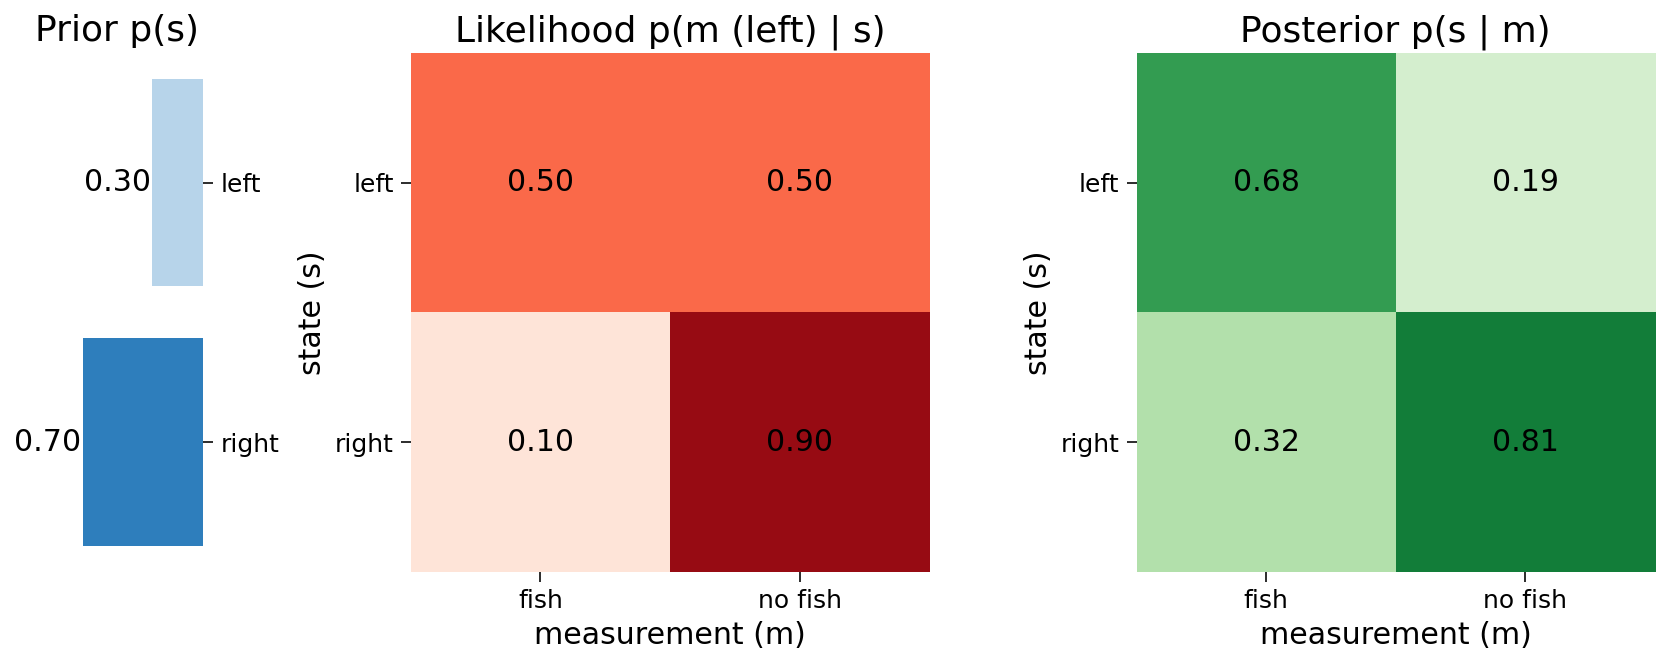

In [5]:
def compute_posterior(likelihood, prior):
  """ Use Bayes' Rule to compute posterior from likelihood and prior

  Args:
    likelihood (ndarray): i x j array with likelihood probabilities where i is
                    number of state options, j is number of measurement options
    prior (ndarray): i x 1 array with prior probability of each state

  Returns:
    ndarray: i x j array with posterior probabilities where i is
            number of state options, j is number of measurement options

  """



  # Compute unnormalized posterior (likelihood times prior)
  posterior = likelihood*prior # first row is s = left, second row is s = right

  # Compute p(m)
  p_m = np.sum(posterior, axis = 0)

  # Normalize posterior (divide elements by p_m)
  posterior /= p_m

  return posterior


# Make prior
prior = np.array([0.3, 0.7]).reshape((2, 1)) # first row is s = left, second row is s = right

# Make likelihood
likelihood = np.array([[0.5, 0.5], [0.1, 0.9]]) # first row is s = left, second row is s = right

# Compute posterior
posterior = compute_posterior(likelihood, prior)

# Visualize
plot_prior_likelihood_posterior(prior, likelihood, posterior)

In [6]:
# @markdown Execute this cell to enable the widget
# style = {'description_width': 'initial'}
ps_widget = widgets.FloatSlider(0.3, description='p(s = left)',
                                min=0.01, max=0.99, step=0.01)
p_a_s1_widget = widgets.FloatSlider(0.5, description='p(fish on left | state = left)',
                                    min=0.01, max=0.99, step=0.01, style=style, layout=Layout(width='370px'))
p_a_s0_widget = widgets.FloatSlider(0.1, description='p(fish on left | state = right)',
                                    min=0.01, max=0.99, step=0.01, style=style, layout=Layout(width='370px'))
# observed_widget = widgets.Checkbox(value=False, description='Observed fish (m)',
#                                  disabled=False, indent=False,
#                                  layout=Layout(display="flex", justify_content="center"))

observed_widget = ToggleButtons(options=['Fish', 'No Fish'],
    description='Observation (m) on the left:', disabled=False, button_style='',
    layout=Layout(width='auto', display="flex"),
    style={'description_width': 'initial'}
)

widget_ui = VBox([ps_widget,
                  HBox([p_a_s1_widget, p_a_s0_widget]),
                  observed_widget])
widget_out = interactive_output(plot_prior_likelihood,
                                {'ps': ps_widget,
                                'p_a_s1': p_a_s1_widget,
                                'p_a_s0': p_a_s0_widget,
                                'measurement': observed_widget})
display(widget_ui, widget_out)

# @widgets.interact(
#     ps=ps_widget,
#     p_a_s1=p_a_s1_widget,
#     p_a_s0=p_a_s0_widget,
#     m_right=observed_widget
# )
# def make_prior_likelihood_plot(ps,p_a_s1,p_a_s0,m_right):
#     fig = plot_prior_likelihood(ps,p_a_s1,p_a_s0,m_right)
#     plt.show(fig)
#     plt.close(fig)
#     return None

Output()

In [7]:
# @markdown Execute this cell to enable the widget
# style = {'description_width': 'initial'}

ps_widget = widgets.FloatSlider(0.3, description='p(s = left)',
                                min=0.01, max=0.99, step=0.01, layout=Layout(width='300px'))
p_a_s1_widget = widgets.FloatSlider(0.5, description='p(fish on left | state = left)',
                                    min=0.01, max=0.99, step=0.01, style=style, layout=Layout(width='370px'))
p_a_s0_widget = widgets.FloatSlider(0.1, description='p(fish on left | state = right)',
                                    min=0.01, max=0.99, step=0.01, style=style, layout=Layout(width='370px'))

observed_widget = ToggleButtons(options=['Fish', 'No Fish'],
    description='Observation (m) on the left:', disabled=False, button_style='',
    layout=Layout(width='auto', display="flex"),
    style={'description_width': 'initial'}
)

widget_ui = VBox([ps_widget,
                  HBox([p_a_s1_widget, p_a_s0_widget]),
                  observed_widget])

widget_out = interactive_output(plot_prior_likelihood_utility,
                                {'ps': ps_widget,
                                'p_a_s1': p_a_s1_widget,
                                'p_a_s0': p_a_s0_widget,
                                'measurement': observed_widget})
display(widget_ui, widget_out)

# @widgets.interact(
#     ps=ps_widget,
#     p_a_s1=p_a_s1_widget,
#     p_a_s0=p_a_s0_widget,
#     m_right=observed_widget
# )
# def make_prior_likelihood_utility_plot(ps, p_a_s1, p_a_s0,m_right):
#     fig = plot_prior_likelihood_utility(ps, p_a_s1, p_a_s0,m_right)
#     plt.show(fig)
#     plt.close(fig)
#     return None

Output()